**A. Длины всех слов - 2**


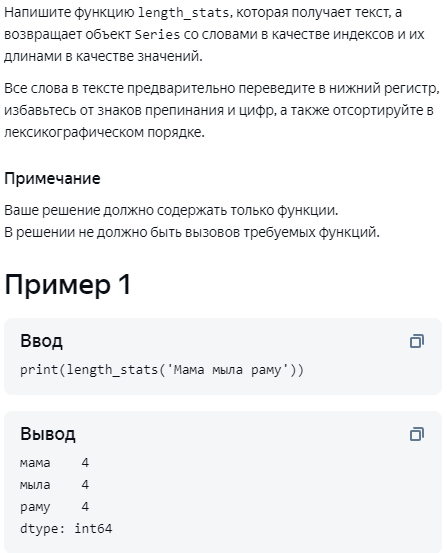


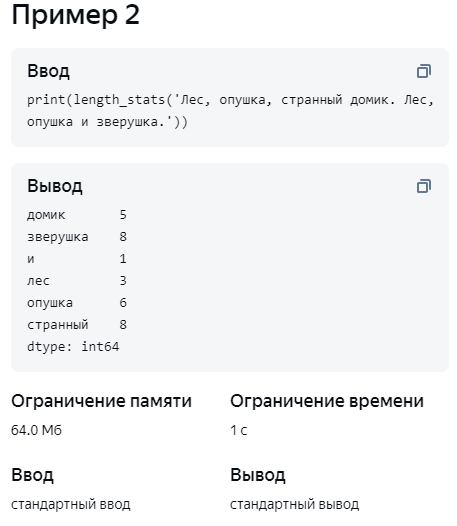

In [ ]:
import pandas as pd
import string


def length_stats(text: str) -> pd.Series:
    text = sorted(set(text.lower().translate(str.maketrans('', '', string.punctuation + '0123456789')).split()))
    return pd.Series([len(word) for word in text], index=text)

**B. Длины всех слов по чётности**


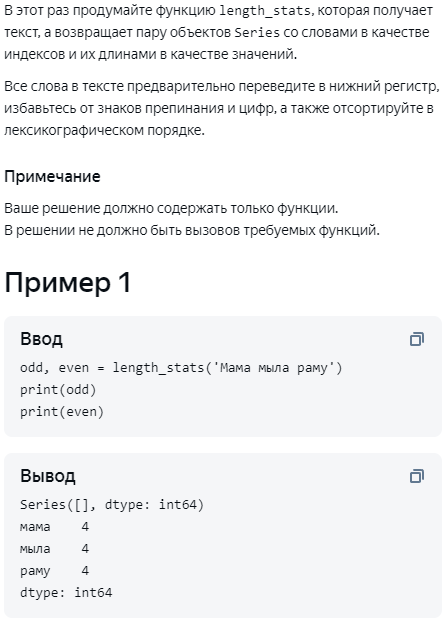


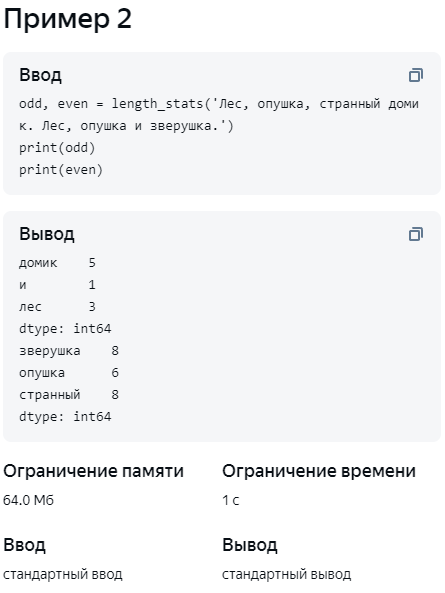

In [ ]:
import pandas as pd
import string


def length_stats(text: str) -> tuple[pd.Series, pd.Series]:
    text = sorted(set(text.lower().translate(str.maketrans('', '', string.punctuation + '0123456789')).split()))
    return (s := pd.Series([len(word) for word in text], index=text))[s % 2 == 1], s[s % 2 == 0]

**C. Чек - 2**


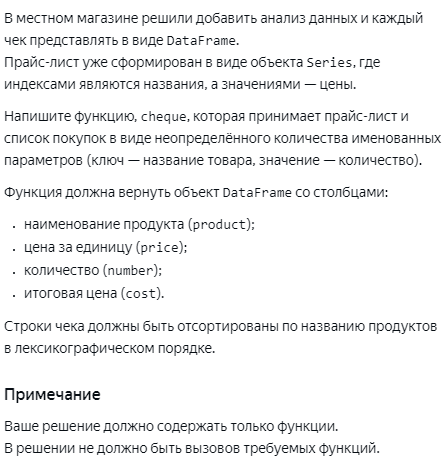


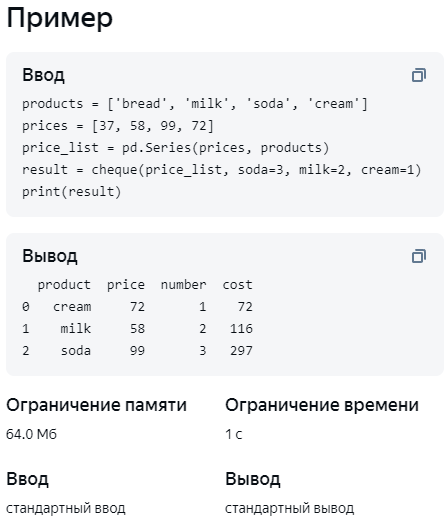

In [ ]:
import pandas as pd


def cheque(list_of_prices: pd.Series, **shopping_list) -> pd.DataFrame:
    products_in_order = sorted(shopping_list.keys())
    cheque_dict = {'product': products_in_order, 'price': list_of_prices[products_in_order].values,
                   'number': [shopping_list[key] for key in products_in_order]}

    cheque_for_person = pd.DataFrame(cheque_dict)
    cheque_for_person['cost'] = cheque_for_person['price'] * cheque_for_person['number']
    return cheque_for_person

**D. Акция**


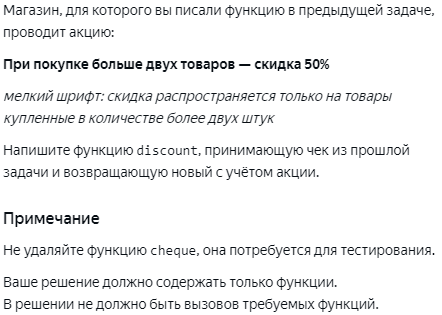


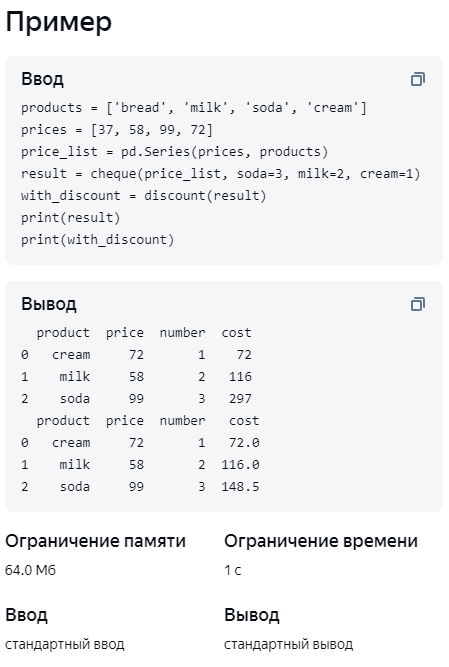

In [ ]:
import pandas as pd


def cheque(list_of_prices: pd.Series, **shopping_list) -> pd.DataFrame:
    products_in_order = sorted(shopping_list.keys())
    cheque_dict = {'product': products_in_order, 'price': list_of_prices[products_in_order].values,
                   'number': [shopping_list[key] for key in products_in_order]}

    cheque_for_person = pd.DataFrame(cheque_dict)
    cheque_for_person['cost'] = cheque_for_person['price'] * cheque_for_person['number']
    return cheque_for_person


def discount(cheque_without_discount):
    cheque_with_discount = cheque_without_discount.copy()
    cheque_with_discount.loc[cheque_with_discount['number'] > 2, 'cost'] = cheque_with_discount['cost'] * 0.5
    return cheque_with_discount

**E. Длинные слова**


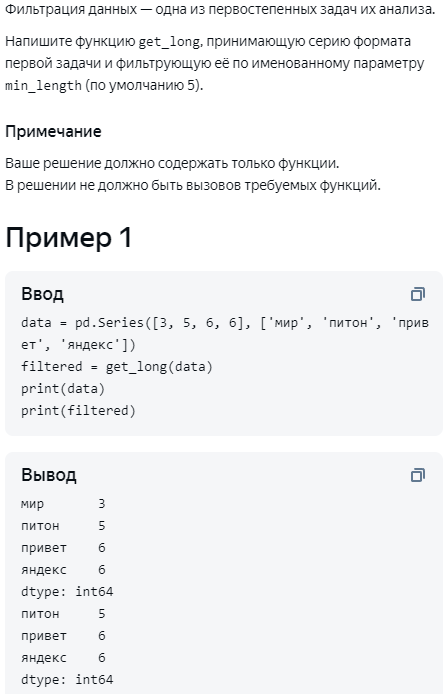


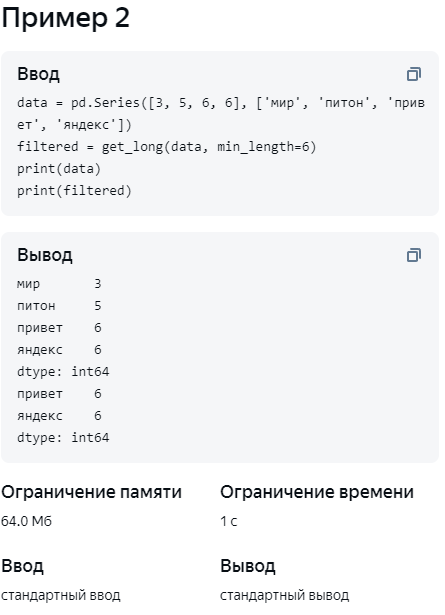

In [ ]:
import pandas as pd


def get_long(not_filtered: pd.Series, min_length=5) -> pd.Series:
    return not_filtered[not_filtered >= min_length]

**F. Отчёт успеваемости**


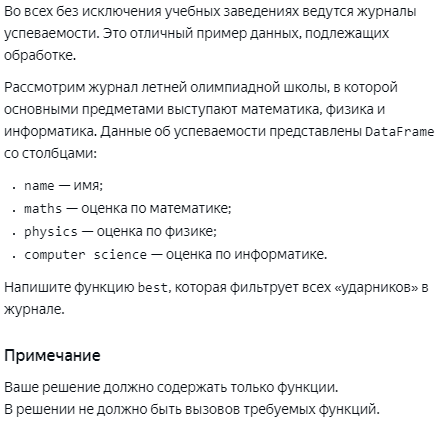


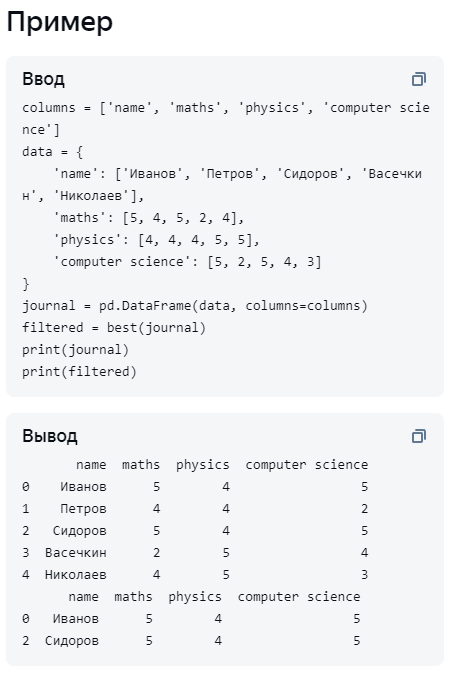


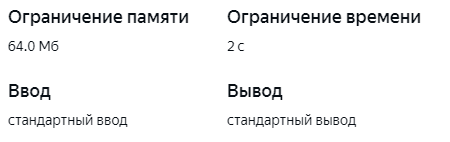

In [ ]:
import pandas as pd


def best(grade_book: pd.DataFrame) -> pd.DataFrame:
    return grade_book.loc[(grade_book['maths'] > 3) & (grade_book['physics'] > 3) & (grade_book['computer science'] > 3)]

**G. Отчёт неуспеваемости**


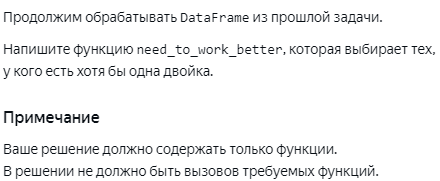


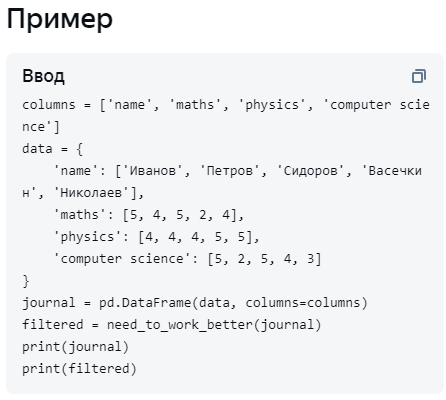


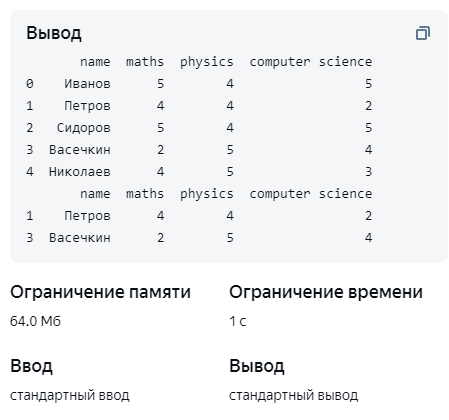

In [ ]:
import pandas as pd


def need_to_work_better(grade_book: pd.DataFrame) -> pd.DataFrame:
    return grade_book.loc[
        (grade_book['maths'] == 2) | (grade_book['physics'] == 2) | (grade_book['computer science'] == 2)]

**H. Обновление журнала**


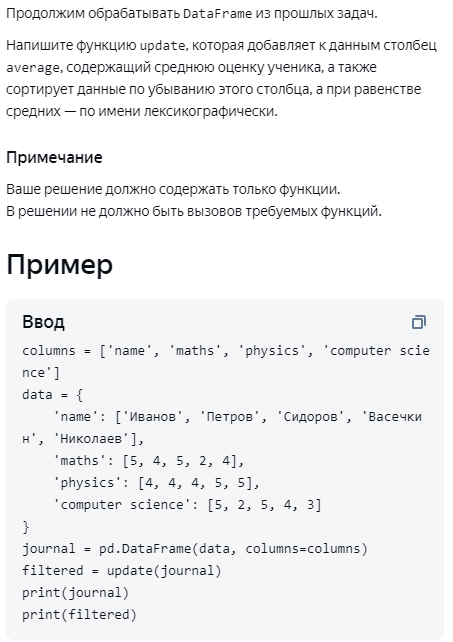


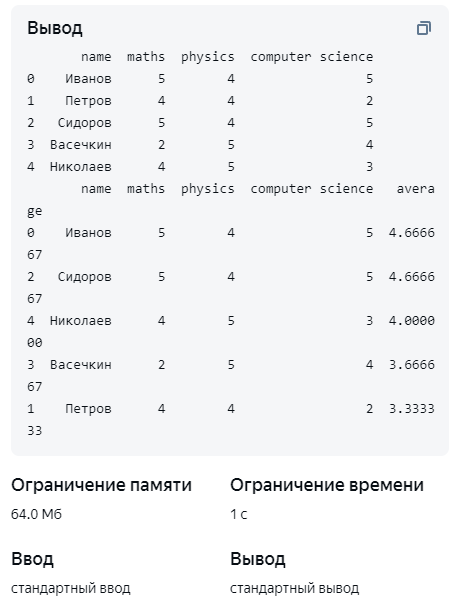

In [ ]:
import pandas as pd


def update(grade_book: pd.DataFrame) -> pd.DataFrame:
    updated = grade_book.copy()
    updated['average'] = (updated['maths'] + updated['physics'] + updated['computer science']) / 3
    return updated.sort_values(['average', 'name'], ascending=(False, True))

**I. Бесконечный морской бой**


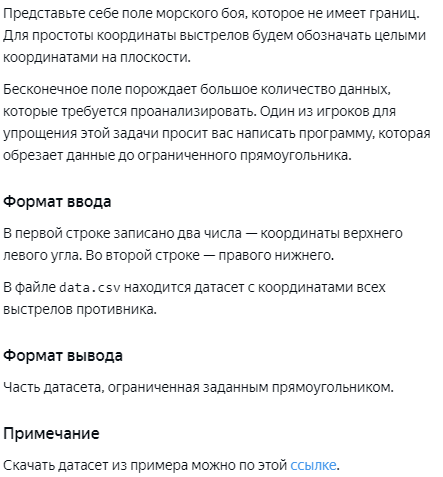


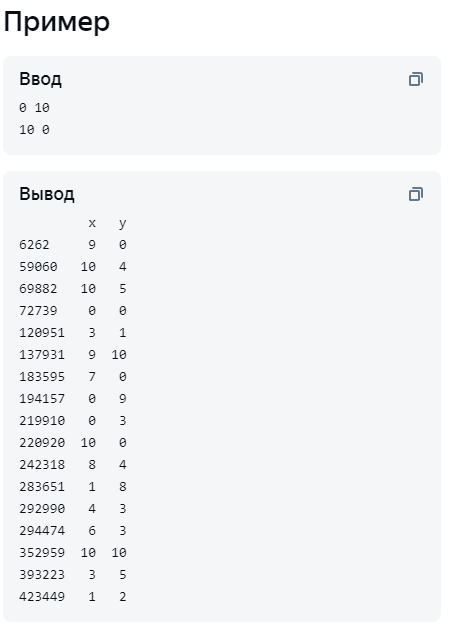


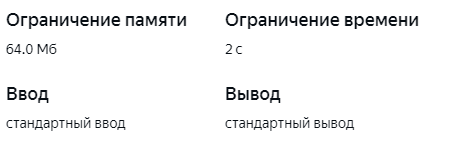

In [ ]:
import pandas as pd

battle_field = pd.read_csv("data.csv")

left_upper_corner = tuple(int(coord) for coord in input().split())
right_lower_corner = tuple(int(coord) for coord in input().split())

print(battle_field.loc[(battle_field['x'] <= right_lower_corner[0]) & (battle_field['x'] >= left_upper_corner[0]) & (
        battle_field['y'] <= left_upper_corner[1]) & (battle_field['y'] >= right_lower_corner[1])])

**J. Экстремум функции**


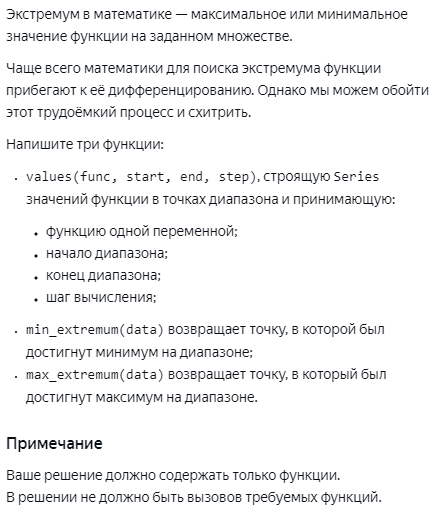


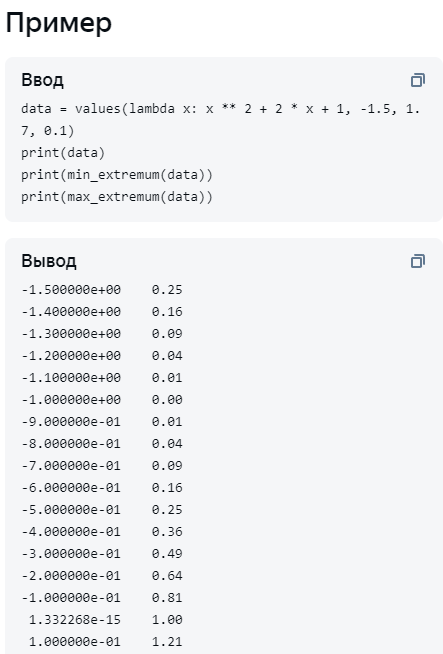


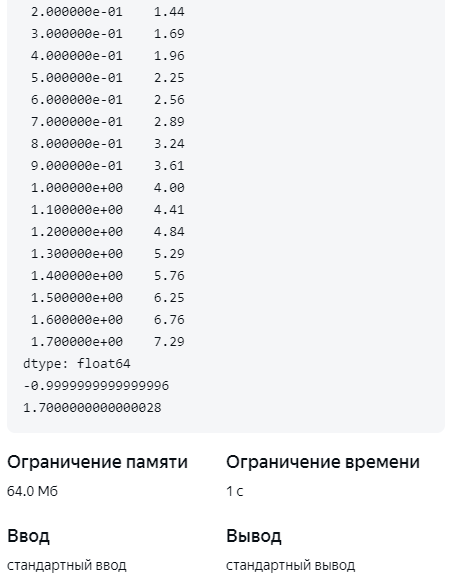

In [ ]:
import numpy as np
import pandas as pd


def values(func, start, end, step):
    range_for_calculation = np.arange(start, end + step, step)
    return pd.Series(func(range_for_calculation), index=range_for_calculation)


def min_extremum(func):
    return func.sort_values().head(1).index[0]


def max_extremum(func):
    return func.sort_values().tail(1).index[0]